In [1]:
pip install matplotlib biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 59.6 MB/s eta 0:00:00


Sequence 1 base counts [A,T,G,C]: [3 4 4 3]
Sequence 2 base counts [A,T,G,C]: [4 4 3 3]
Sequence 3 base counts [A,T,G,C]: [4 3 4 3]
Sequence 1 GC Content: 50.00%
Sequence 2 GC Content: 42.86%
Sequence 3 GC Content: 50.00%


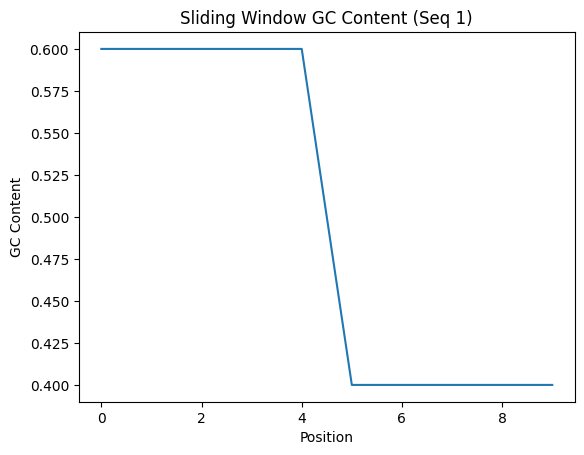

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# defining dna sequences
sequences=[
    "ATGCGTACGTTAGC",
    "TTAGGCTAGCTAAC",
    "GGCATCGTAGCTAA"
]
# Mapping: A=0, T=1, G=2, C=3
def encode_sequence(seq):
    mapping = {'A': 0, 'T': 1, 'G': 2, 'C': 3}
    return np.array([mapping[base] for base in seq])

# Example:
encoded = [encode_sequence(seq) for seq in sequences]
encoded

def count_bases(encoded_seq):
    return np.bincount(encoded_seq, minlength=4)

for i, seq in enumerate(encoded):
    print(f"Sequence {i+1} base counts [A,T,G,C]:", count_bases(seq))

    def gc_content(encoded_seq):
      return (np.sum(encoded_seq == 2) + np.sum(encoded_seq == 3)) / len(encoded_seq)

for i, seq in enumerate(encoded):
    print(f"Sequence {i+1} GC Content: {gc_content(seq) * 100:.2f}%")


    # plot gc content in sliding window
def sliding_gc(seq, window=5):
    gc_values = []
    for i in range(len(seq) - window + 1):
        window_seq = encode_sequence(seq[i:i+window])
        gc_values.append(gc_content(window_seq))
    return np.array(gc_values)

# Plot for first sequence
gc_vals = sliding_gc(sequences[0], window=5)
plt.plot(gc_vals)
plt.title("Sliding Window GC Content (Seq 1)")
plt.xlabel("Position")
plt.ylabel("GC Content")
plt.show()
